Inductieve statistiek
===

In dit notebook gaan we __steekproeven__ onderzoeken. In het bijzonder zijn we benieuwd hoe steekproeven zich verhouden tot de populatie. Om daar inzicht in te krijgen, gaan we als volgt te werk:

1. Hoe ziet de verdeling van een steekproef eruit?
2. Is een steekproefgemiddelde representatief voor het populatiegemiddelde; wat is het effect van de steekproefgrootte $n$?
3. Wanneer we meerdere steekproeven nemen van dezelfde grootte $n$, hoe ziet de verdeling van deze gemiddeldes er dan uit?
4. Wanneer we een steekproefgemiddelde hebben, met wat voor zekerheid kunnen we dan uitspraken doen over het populatiegemiddelde?

In [1]:
#Imports en helperfuncties
import random
from scipy import stats as ss
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
hu_rood = "#d7000d"
hu_blauw = "#00a0d2"
mpl.style.use(['seaborn-notebook', 'seaborn-darkgrid'])

### 1. Steekproeven


Een _Steekproef_ is een __willekeurige__ selectie van een deelverzameling uit een _populatie_. De populatie laat zich beschrijven door een kansverdeling, waarvan we meestal de parameters niet kennen (zoals het gemiddelde of STD). In de praktijk duiken er vele soorten kansverdelingen op, bijv:

- De normale verdeling, gespecificeerd door parameters $\mu$ (gemiddelde) en $\sigma$ (STD)
- De uniforme verdeling ( https://nl.wikipedia.org/wiki/Uniforme_verdeling_(continu) ), waarbij de kansdichtheid op een interval overal hetzelfde is. Deze verdeling wordt gespecificeerd door een ondergrens en een bovengrens, die het interval vastlegt.
- De Poisson-verdeling ( https://nl.wikipedia.org/wiki/Poissonverdeling ), die de verdeling van wachttijden modelleert, gegeven de parameter $\lambda$: Het gemiddeld aan gebeurtenissen per tijdseenheid.

Een hele populatie onderzoeken is in de praktijk vaak onmogelijk (b.v. wat wegen alle huismussen in Nederland) of onbetaalbaar (b.v. peiling op welke partij elke volwassene in Nederland gaat stemmen bij de gemeenteraadsverkiezingen). In zulke gevallen zullen we een steekproef gebruiken om uitspraken te kunnen doen over die gehele populatie. Hoe goed dergelijke uitspraken zijn, dat is het onderzoeksterrein van deze Notebook.

Allereerst kiezen we een willekeurige populatieverdeling en gaan we deze plotten.
Merk op dat we hier dus veronderstellen dat we de parameters van een populatie kennen, een aanname die in de praktijk uiteraard niet gedaan kan worden, want dit zijn nu juist de statistieken waar we een uitspraak over zouden willen doen.

In de volgende cell staan een aantal opties uitgecommentarieerd, dus kies daar één van.

In [3]:
# functie voor afdrukken verdelingsfuncties
def plot_verdeling(verdeling):
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(verdeling.ppf(0.001), verdeling.ppf(0.999), 100)
    ax.plot(x, verdeling.pdf(x), 'k-', lw=2, label='frozen pdf')
    ax.set_xlim(0, 400)

Populatiegemiddelde: 200.00, standaardafwijking van populatie: 119.52


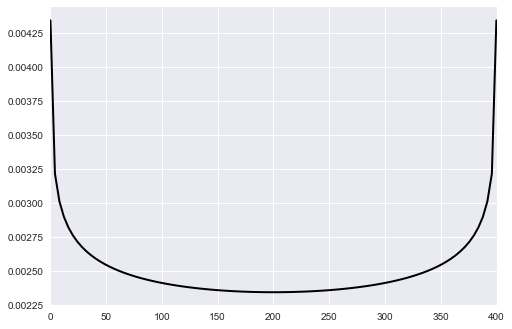

In [4]:
#Selecteer één van onderstaande populaties om te onderzoeken
populatie = ss.norm(200, 50)   # Deze is niet aan te raden
populatie = ss.uniform(0, 400)
populatie = ss.beta(.9, .9, 0, 400)
#populatie = ss.chi2(5, 0, 20)

mu = populatie.mean()
sigma = populatie.std()

plot_verdeling(populatie)
print("Populatiegemiddelde: {:.2f}, standaardafwijking van populatie: {:.2f}".format(mu, sigma))

In de praktijk zijn we niet in staat om een dergelijke distributie daadwerkeling via metingen te verkrijgen. In plaats daarvan gebruikt men een **steekproef**: Willekeurig worden _n_ metingen verricht, waaruit men hoopt te kunnen generaliseren naar de populatie (inductie).

In [5]:
# Steekproefgrootte
n = 100000

#Neem een steekproef van grootte n. Gebruik hiervoor de functie rvs ( https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.rvs.html )
steekproef = populatie.rvs(size=n) 

Steekproefgemiddelde: 200.48, standaardafwijking van steekproef: 119.58


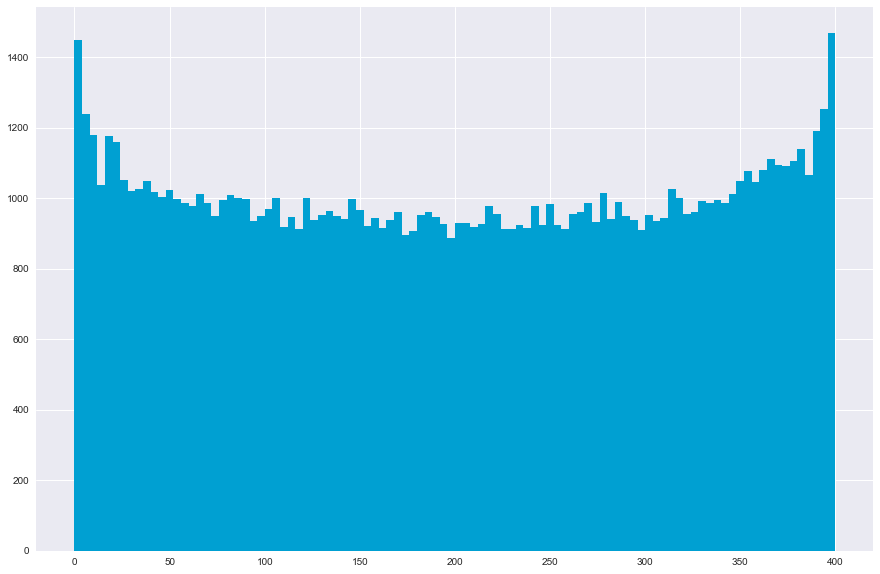

In [6]:
#Teken een histogram van de steekproef
plt.figure(figsize=(15,10))
plt.hist(steekproef, color=hu_blauw, bins=100)

print("Steekproefgemiddelde: {:.2f}, standaardafwijking van steekproef: {:.2f}".format(steekproef.mean(), steekproef.std()))

# Varieer de steekproefgrootte n, wanneer vind je dat de steekproefverdeling begint te lijken op de populatieverdeling?

Het moge duidelijk wezen dat de verdeling van de steekproef aardig overeenkomt met de verdeling van de populatie, waarbij de overeenkomst groter wordt naarmate we _n_ groter maken. We zullen nooit 100% overeenkomst krijgen, omdat de steekproef een **discrete** verdeling is, terwijl de populatie **continu** wordt verondersteld (overigens gelden alle resultaten uit dit notebook ook als de populatie discreet wordt veronderdersteld).

### 2. Steekproefgemiddelden vs Populatiegemiddelden

In bovenstaande discussie werd de populatieverdeling als bekend verondersteld. We wisten vooraf hoe de meetwaarden verdeeld waren (bijv. uniform of normaal), en bovendien wisten we de parameters van de verdeling (bijv. $\mu$ en $\sigma$).

In de praktijk is de situatie uiteraard niet zo rooskleurig en gebruiken we de steekproeven nu juist om een inschatting te maken van de populatieverdeling! Bovenstaand proces zou dan dus eigenlijk omgekeerd plaats moeten vinden: We nemen een steekproef en hopen aan de hand van de statistieken over de _steekproef_ (gemiddelde en standaard deviatie) een uitspraak te kunnen doen over de statistieken van de _populatie_.

Laten we deze situatie simuleren om te kijken hoe goed de steekproefstatistieken overeenkomen met de populatiestatistieken.

In [7]:
#Neem steekproeven van oplopende groottes uit een onbekende populatie, bijv. varierend van 5 tot 1000 met stapgrootte 5)
groottes = [i for i in range(5, 1005, 5)]
steekproeven = np.array([populatie.rvs(size=g) for g in groottes])

In [8]:
#bereken de afwijking van het gemiddelde en de standaard deviatie per steekproef
means = [sp.mean() - mu for sp in steekproeven]
stds  = [sp.std() - sigma for sp in steekproeven]

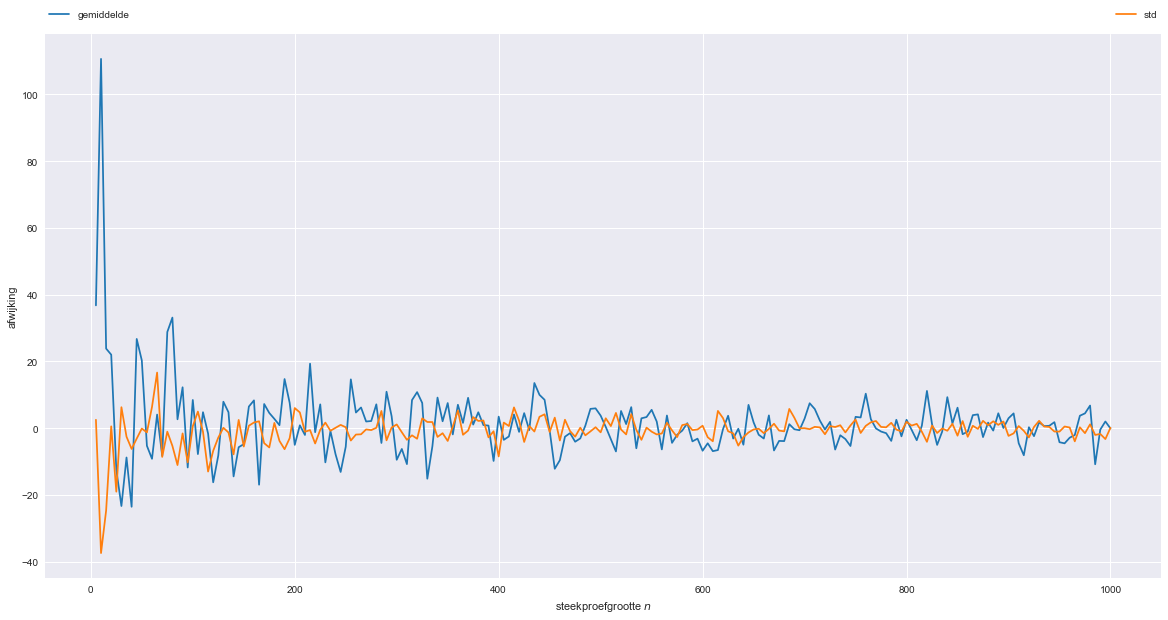

In [9]:
#Plot de afwijking van de populatiegemiddelde naar steekproefgrootte
plt.figure(figsize=(20,10))
plt.plot(groottes, means, label="gemiddelde")
plt.plot(groottes, stds, label="std")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.ylabel("afwijking")
plt.xlabel("steekproefgrootte $n$")
#plt.ylim(-2,2)
plt.show()    

Bovenstaande plot laat redelijk zien dat naarmate de steekproefgrootte toeneemt, de statistieken voor de steekproef steeds beter overeenkomt met de statistieken voor de populatie. Men noemt dit in de statistiek ___De wet van de grote aantallen___ ( https://nl.wikipedia.org/wiki/Wetten_van_de_grote_aantallen ).

### 3.1 Meerdere herhalingen van de steekproef per grootte $n$

Bovenstaande grafiek trekt voor iedere steekproefgrootte een willekeurige steekproef. Deze grafiek is dus per definitie een willekeurige. Wat we graag willen weten is hoe steekproefstatistieken zich _statistisch_ gedragen t.o.v. populatiestatistieken. M.a.w.: wat is de spreiding van de steekproefstatistieken?

Om deze vraag te beantwoorden doen we een experiment wat we in werkelijkheid nooit zouden (kunnen) doen: we gaan heel veel steekproeven nemen om te kijken hoe elk van deze steekproeven zich verhoudt tot de kengetallen van de populatie. (Bedenk dat we de populatie normaal dus niet zouden kennen, maar in dit experiment wel - daarom kunnen we de vergelijking maken.) We kunnen deze situatie makkelijk simuleren door per steekproefgrootte niet één, maar bijvoorbeeld $h = 1000$ steekproeven te nemen. Bij iedere steekproefgrootte hoort dan een verzameling aan steekproeven en als we de statistieken (bijv. gemiddelden) hierover middelen, dan krijgen we een verdeling.

NB. We zullen ons in deze cursus beperken tot het gedrag van gemiddeldes, omdat dit voldoende inzicht verschaft in het proces.

Houd in gedachte dat er nu dus sprake is van 3 "soorten" verdelingen per $n$:
1. De populatieverdeling (1 maal), hieruit trekken we de steekproeven
2. De steekproefverdelingen van grootte $n$ ($h = 1000$ maal)
3. De verdeling van het gemiddelde van de steekproeven (1 maal). Iedere steekproef levert 1 gemiddelde, dus deze verdeling bevat $h = 1000$ punten. 



In [10]:
h = 1000       # Aantal herhalingen per grootte
groottes = [1,2,3,4,9,25,36,49,64,81,100,1000]

# Neem h steekproeven per steekproefgrootte n. 
# Gebruik hiervoor wederom de functie rvs, deze kun je via de size-parameter 
# een extra dimensie meegeven, zodat er meerdere steekproeven worden uitgevoerd.
# (bijv. size=(20, 1000) neemt 1000 steekproeven van grootte 20)
steekproeven_hh = np.array([populatie.rvs(size=(g, h)) for g in groottes])

# steekproeven_hh bevat nu dus:
# 10 arrays: [0] bevat 1000 steekproeven met elk 1 meetwaarde
#            [1] bevat 1000 steekproeven met elk 2 meetwaarden
#            [2] bevat 1000 steekproeven met elk 3 meetwaarden
#            ...
#            [10] bevat 1000 steekproeven met elk 100 meetwaarden
#            [11] bevat 1000 steekproeven met elk 1000 meetwaarden

In [11]:
# Bereken de gemiddeldes over elke steekproef
gemiddelden = [hh.mean(axis=0) for hh in steekproeven_hh]

# gemiddelden bevat nu dus:
# 10 arrays: [0] bevat 1000 steekproefgemiddelden, gebaseerd op 1 meetwaarde
#            [1] bevat 1000 steekproefgemiddelden, gebaseerd op 2 meetwaarden
#            [2] bevat 1000 steekproefgemiddelden, gebaseerd op 4 meetwaarden
#            ...
#            [10] bevat 1000 steekproefgemiddelden, gebaseerd op 100 meetwaarden
#            [11] bevat 1000 steekproefgemiddelden, gebaseerd op 1000 meetwaarden


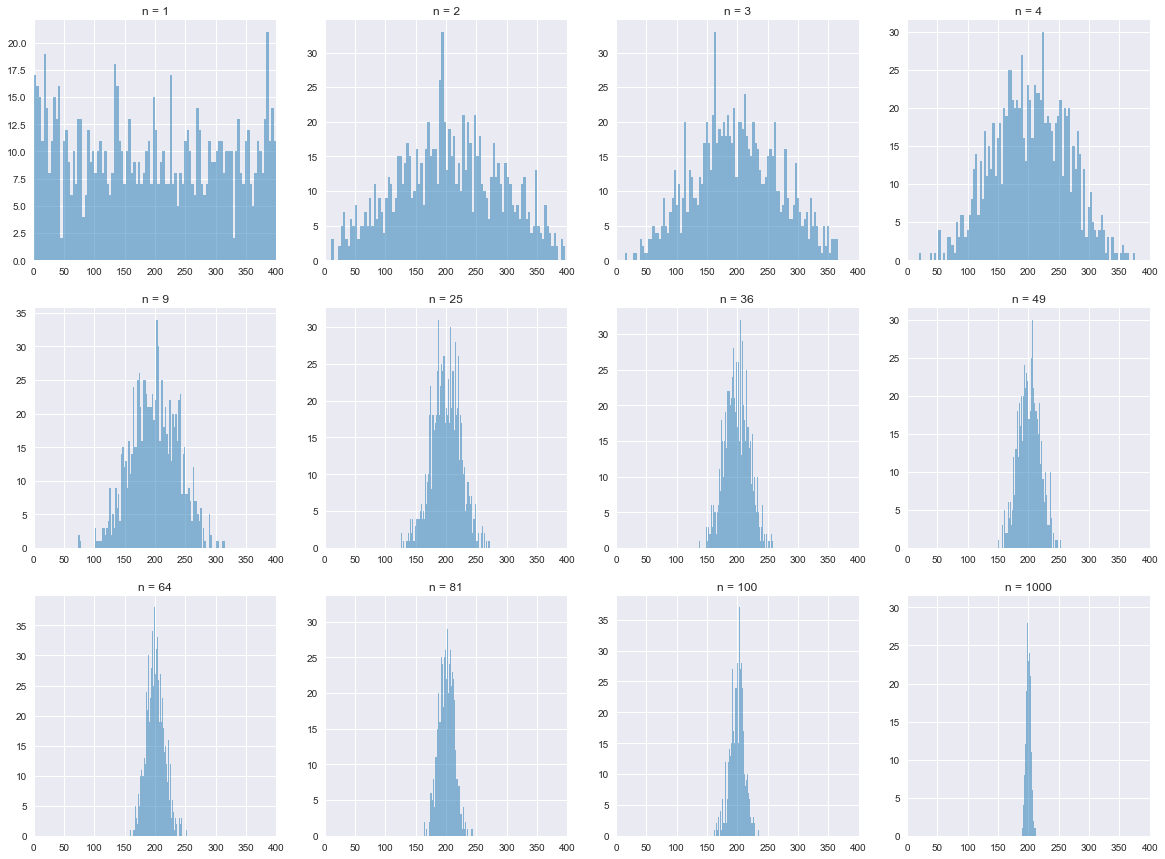

In [12]:
# Plot de populatiegemiddelde per steekproefgrootte (dus meerdere grafieken)

plt.figure(figsize=(20,15))
for i in range(0, 12):
    ax = plt.subplot(3, 4, i+1)
    ax.set_xlim(0, 400)
    #ax.set_xlim(0.44, 0.56)
    plt.hist(gemiddelden[i], bins=100, alpha=0.5)
    plt.title("n = {}".format(groottes[i]))

Bovenstaande plots laten zien dat de verdeling van de steekproefgemiddeldes normaal verdeeld zijn! Dit resultaat staat bekend als de ___Centrale Limietstelling___ ( https://nl.wikipedia.org/wiki/Centrale_limietstelling , vaak afgekort als CLT, naar de Engelse naam Central Limit Theorem) .

De impact deze observatie is groot. We kunnen nu namelijk de volgende gedachtengang hanteren:

1. Neem een steekproef $X$
2. Bereken steekproefgemiddelde $\bar{x}$
3. Dankzij de CLT weten we nu dat $\bar{x}$ met grote waarschijnlijk dicht bij de populatiegemiddelde $\sigma$ ligt.

Bovenstaande redenatie is nog niet helemaal compleet. Allereerst missen we nog wat de STD is voor de normale verdeling. Ten tweede is het begrip "grote waarschijnlijk" nog niet heel concreet. Het eerste probleem behandelen we in de volgende subsectie (3.2), het tweede probleem in de volgende sectie (4).

### 3.2 De STD van het steekproefgemiddelde: _standaardafwijking (van het gemiddelde)_

We hebben nu experimenteel aangetoond dat het steekproefgemiddelde $\bar{x}$ normaal verdeeld is met gemiddelde $\mu$ (vanwege de Wet van de grote aantallen).

Om de Normale verdeling van het steekproefgemiddelde voor een grootte $n$ vast te kunnen leggen, hebben we echter nog tweede parameter nodig, namelijk $\sigma$.

Om inzicht te krijgen hierin, zullen we per steekproefgrootte $n$ de STD van de gemiddeldes plotten.

In [13]:
# Hier gaan de studenten de STDs per steekproefgrootte plotten.
# Het resultaat is dat je ongeveer een wortelfunctie ziet 
# (We zullen de studenten vragen om sqrt(n)*sigma ook in dezelfde grafiek te plotten)

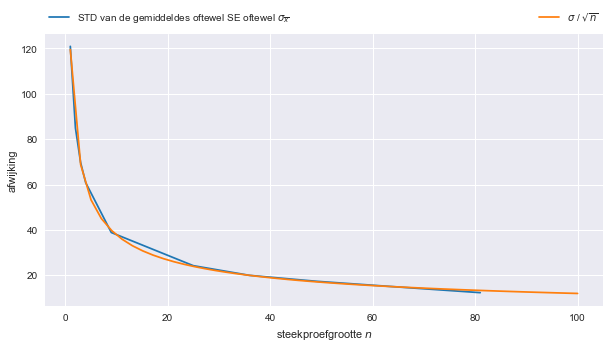

In [14]:
gemiddelden_std = [gm.std() for gm in gemiddelden]
n = np.linspace(1,100)

plt.figure(figsize=(10,5))
plt.plot(groottes[:10], gemiddelden_std[:10], label="STD van de gemiddeldes oftewel SE oftewel $\sigma_{\overline{x}}$")
plt.plot(n, sigma/np.sqrt(n), label="$\sigma$ / $\sqrt{n}$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel("steekproefgrootte $n$")
plt.ylabel("afwijking")
plt.show()

We noemen de STD van de steekproefgemiddeldes de __Standaardafwijking van het (steekproef)gemiddelde__ en noteren dit met $\sigma_{\bar{x}}$ of SE (naar het Engelse Standard Error). 

We hebben nu experimenteel vastgesteld dat $\sigma_{\bar{x}}$ gerelateerd is aan de populatie-STD $\sigma$ via:

$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$

In de praktijk hebben we vaak geen kennis van de populatie-std $\sigma$, dus zullen we gebruik maken van de steekproef-std (notatie $s$). De formule wordt dan:

$\sigma_{\bar{x}} = \frac{s}{\sqrt{n}}$



### 4. Betrouwbaarheid van het populatiegemiddelde

De conclusies tot dusver zijn dat de verdeling van een steekproefgemiddelde normaal verdeeld is (CLT), waarbij de parameters $\mu$ en $\sigma$ gegeven worden door het populatiegemiddelde (Wet van de grote aantallen) en het populatiegemiddelde gedeeld door de wortel van de steekproefgrootte (standaard error).

Dankzij dit inzicht kunnen we nu uitspraken doen over hoeveel vertrouwen we hebben in het gebruik van een steekproefgemiddelde $\bar{x}$ ter benadering voor het (vaak onbekende) populatiegemiddelde $\mu$.

Deze redenatie verloopt als volgt:

1. Stel, we hebben een populatie met onbekende gemiddelde $\mu$ en STD: $\sigma$
2. We nemen een steekproef $X$
3. We bepalen de steekproefstatistieken gemiddelde: $\bar{x}$ en STD: $s$
4. De CLT vertelt ons dat $\bar{x}$ normaal verdeeld is met gemiddelde = $\mu$ (die we niet weten) en STD = Standaard Error = $\frac{s}{\sqrt{n}}$ (we gebruiken $s$ als benadering voor  $\sigma$)
5. Dankzij de 68-95-99.7 regel voor Normale verdelingen kunnen we nu uitspraken doen als:
De kans dat $\bar{x}$ binnen 1 STD (== SE) van $\mu$ afligt is gelijk 68.3%.

(Merk op dat de STD van de normale verdeling van steekproefgemiddeldes per definitie gelijk is aan de SE)

Bovenstaande redentatie vertelt ons dat we dus dankzij de CLT in staat zijn om uitspraken te doen over hoe zeker we zijn dat $\bar{x}$ in de buurt van $\mu$ ligt. 

Het fijne aan stap 5 is echter dat we deze ook andersoms kunnen doen:
ALS $\bar{x}$ binnen 1 SE van $\mu$ ligt, DAN ligt $\mu$ ook binnen 1 SE van $\bar{x}$!

Via deze redenatie zijn we dus in staat om uitspraken doen over het populatiegemiddelde, wanneer we het steekproefgemiddelde weten.

Dergelijke uitspraken doen we via ___betrouwbaarheidsintervallen___. Bovenstaande uitspraak zouden we dan als volgt formuleren:

"De 68.3% betrouwbaarheidsinterval voor het populatiegemiddelde ligt binnen 1 SE van het steekproefgemiddelde."
We kunnen deze uitspraken ook in formulevorm schrijven:
De 68.3% betrouwbaarheidsinterval: $\bar{x} \pm 1SE$ .

Voor een 95.5% betrouwbaarheidsinterval zou gelden:
De 95.5% betrouwbaarheidsinterval: $\bar{x} \pm 2SE$ .

In de praktijk hebben we natuurlijk vaste getallen voor $\bar{x}$ en $SE$.


